<a href="https://colab.research.google.com/github/KamblePranay/D-L-2-to-4-PM-/blob/main/Mobile_Multiclass_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moblie Price Range Multiclass Classification

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1-Reading Traning Dataset

In [5]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_train.csv")

In [6]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# checking Data Quality

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
df.duplicated().sum()

0

### Step1- Separate X and Y (Price-Rnage)

In [18]:
X =df.drop(labels='price_range',axis=1)
Y = df[['price_range']]

In [19]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [22]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [23]:
Y.value_counts()

price_range
0              500
1              500
2              500
3              500
Name: count, dtype: int64

<Axes: xlabel='price_range'>

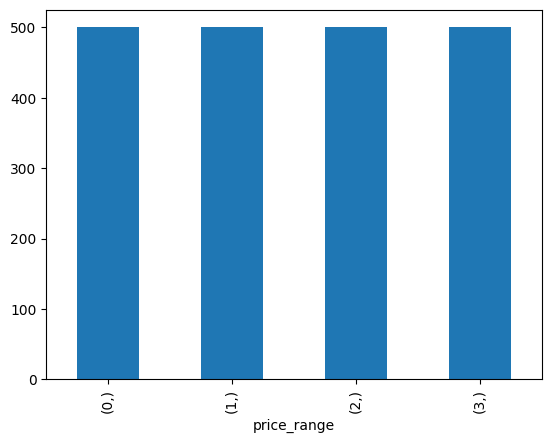

In [25]:
Y.value_counts().plot(kind='bar')

# Step 4: Create a preprocessing Pipeline for X , One Hot encode the target feature

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [27]:
num_pipe =  Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [28]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


# Step 5: Apply Train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_pre,Y,test_size=0.2, random_state=42)

In [31]:
Xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [32]:
Ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [33]:
Xtest.shape

(400, 20)

In [34]:
Ytest.shape

(400, 1)

# Apply one hot encoding on ytrain and ytest

In [35]:
from keras.utils import to_categorical

In [38]:
Ytrain_cat = to_categorical(Ytrain)
Ytest_cat = to_categorical(Ytest)

In [40]:
Ytrain_cat[0::5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [41]:
Ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [42]:
Ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


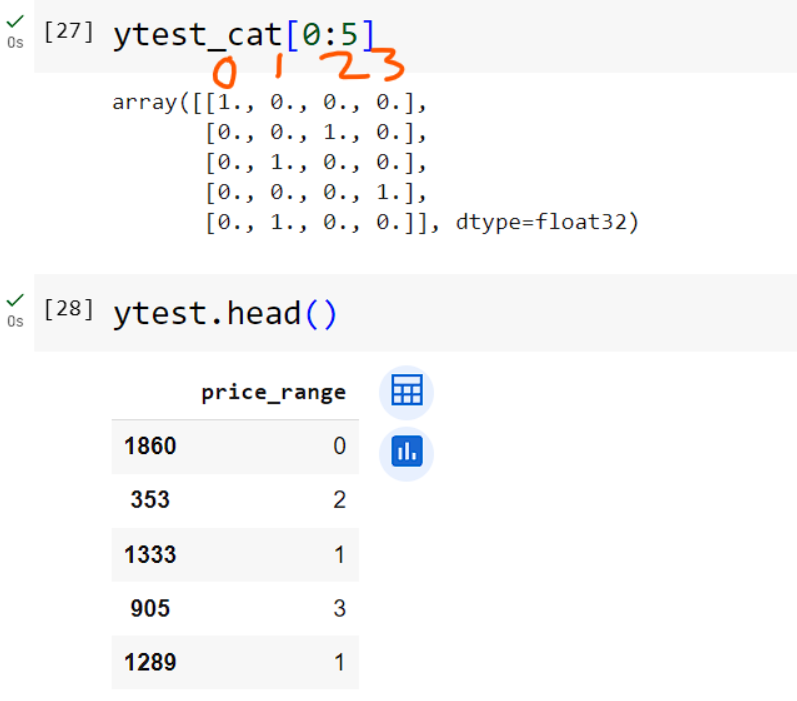

# Step 6: Build the neural network

In [43]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

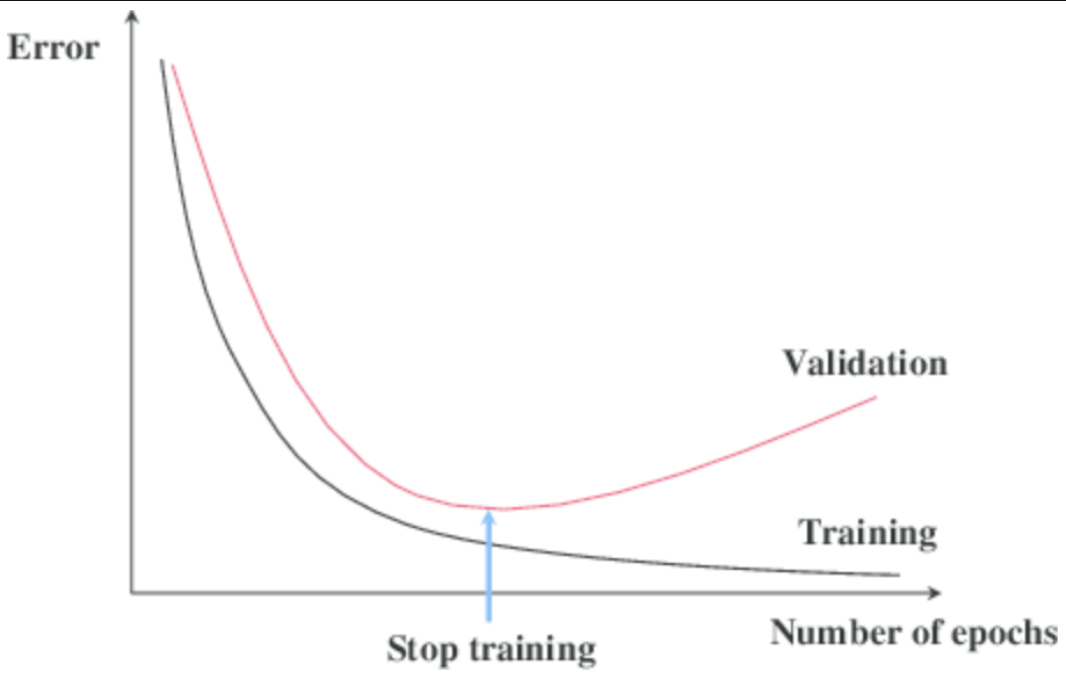

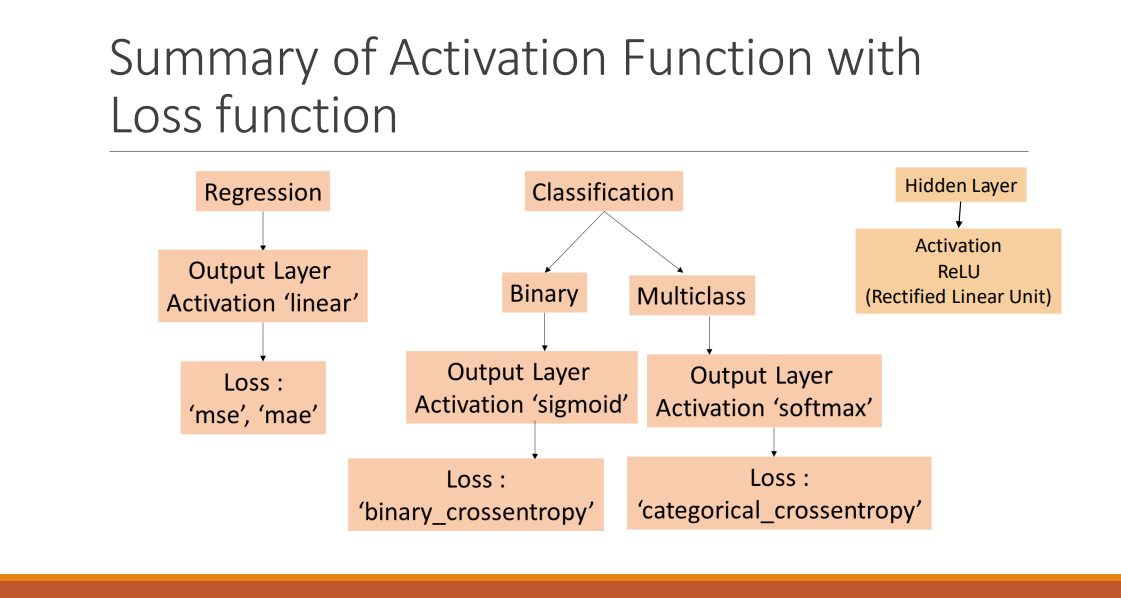

In [45]:
Xtrain.shape

(1600, 20)

In [47]:
Ytrain_cat.shape

(1600, 4)

In [50]:
model = Sequential()

# Create input layer
model.add(Input(shape=(Xtrain.shape[1],)))
# Add Hidden Layer 1
model.add(Dense(units=64, activation='relu'))
# Add Dropout layer 1
model.add(Dropout(rate=0.3))
# Add Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add Dropout Layer 2
model.add(Dropout(rate=0.2))
# Add Output Layer'
model.add(Dense(units=Ytrain_cat.shape[1], activation='softmax'))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1344      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
es = EarlyStopping(monitor='val_loss', patience=15)

In [55]:
hist = model.fit(Xtrain, Ytrain_cat, validation_split=0.2, epochs=200, callbacks=[es])

Epoch 1/200
40/40 [==============================] - 3s 9ms/step - loss: 1.4341 - accuracy: 0.2844 - val_loss: 1.3070 - val_accuracy: 0.3750
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 1.2703 - accuracy: 0.3875 - val_loss: 1.1896 - val_accuracy: 0.4906
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 1.1441 - accuracy: 0.4609 - val_loss: 1.0478 - val_accuracy: 0.5562
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 1.0177 - accuracy: 0.5500 - val_loss: 0.8981 - val_accuracy: 0.6344
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.8988 - accuracy: 0.6000 - val_loss: 0.7699 - val_accuracy: 0.7031
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.7778 - accuracy: 0.6562 - val_loss: 0.6671 - val_accuracy: 0.7437
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.7160 - accuracy: 0.6898 - val_loss: 0.5892 - val_accuracy: 0.7937
Epoch 8/200
4

# Plot the learning curve

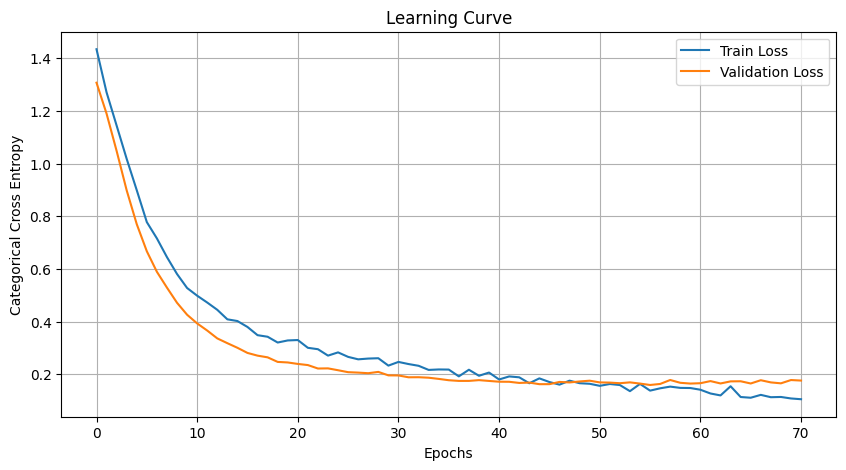

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label ='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Learning Curve')
plt.grid()
plt.legend()
plt.show()

# Step 7: Evaluate model


In [59]:
model.evaluate(Xtrain, Ytrain_cat)

50/50 [==============================] - 0s 8ms/step - loss: 0.0596 - accuracy: 0.9837


[0.05963585898280144, 0.9837499856948853]

In [61]:
model.evaluate(Xtest, Ytest_cat)

13/13 [==============================] - 0s 7ms/step - loss: 0.1603 - accuracy: 0.9275


[0.16030645370483398, 0.9275000095367432]

# predict the probablity for train and test

In [62]:
yprob_train = model.predict(Xtrain)
yprob_test = model.predict(Xtest)

13/13 [==============================] - 0s 2ms/step


In [66]:
yprob_train[0:5]

array([[5.5201404e-08, 9.2283034e-01, 7.7169500e-02, 5.1433227e-09],
       [6.4750916e-33, 2.5118363e-06, 7.8154665e-01, 2.1845090e-01],
       [8.6536503e-01, 1.3463496e-01, 4.2979880e-11, 1.1063168e-29],
       [3.3149110e-31, 1.4443937e-07, 7.2357751e-02, 9.2764217e-01],
       [3.8727441e-05, 9.9864024e-01, 1.3210240e-03, 1.0711900e-12]],
      dtype=float32)

In [67]:
yprob_test[0:5]

array([[9.8976338e-01, 1.0236614e-02, 5.2757364e-13, 3.6689185e-34],
       [1.4320501e-16, 5.4142247e-03, 9.9449497e-01, 9.0784197e-05],
       [2.6141442e-04, 9.9969995e-01, 3.8640199e-05, 1.4231532e-17],
       [0.0000000e+00, 4.6246605e-12, 7.2955410e-04, 9.9927050e-01],
       [2.2054692e-06, 9.9649858e-01, 3.4991715e-03, 1.3719236e-11]],
      dtype=float32)

In [68]:
import numpy as np
ypred_train = np.argmax(yprob_train,axis=1)
ypred_test = np.argmax(yprob_test,axis=1)

In [69]:
ypred_train[0:5]

array([1, 2, 0, 3, 1])

In [72]:
Ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [70]:
ypred_test[0:5]

array([0, 2, 1, 3, 1])

In [73]:
Ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


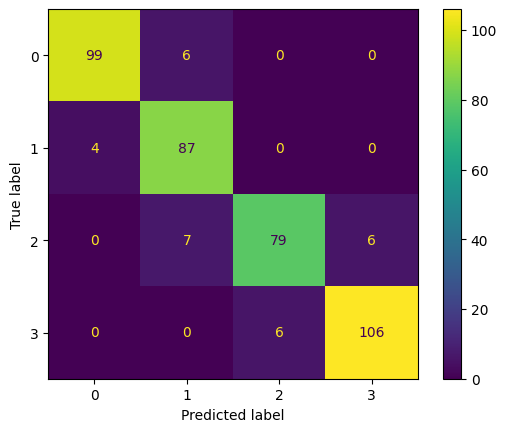

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(Ytest,ypred_test)
cdf = ConfusionMatrixDisplay(cf)
cdf.plot()

# Print Classfication Report

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(Ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.87      0.96      0.91        91
           2       0.93      0.86      0.89        92
           3       0.95      0.95      0.95       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



From aboove data i have f1 socre Macro Average 0.91>0.8 hence above model is good and can be used for any predictions

In [77]:
model.save('MobileModel.keras')

# out of sample prediction

In [78]:
xnew = pd.read_csv('https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_test.csv')
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [79]:
xnew.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [80]:
xnew2 = xnew.drop(columns=['id'])

In [81]:
xnew2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [82]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [83]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [84]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


# Predict the probability with results

In [85]:
probs = model.predict(xnew_pre)
probs[0:5]

32/32 [==============================] - 0s 2ms/step


array([[2.84829746e-32, 4.87792704e-08, 1.06841564e-01, 8.93158376e-01],
       [0.00000000e+00, 4.00673314e-11, 1.29772059e-03, 9.98702288e-01],
       [7.24098423e-24, 5.73093130e-05, 8.54819000e-01, 1.45123735e-01],
       [0.00000000e+00, 6.29932304e-14, 6.00530293e-05, 9.99939919e-01],
       [3.54334807e-05, 9.98332322e-01, 1.63223140e-03, 5.11521164e-12]],
      dtype=float32)

In [86]:
preds = np.argmax(probs, axis=1)
max_probs = np.max(probs, axis=1)

In [87]:
preds[0:5]

array([3, 3, 2, 3, 1])

In [88]:
max_probs[0:5]


array([0.8931584, 0.9987023, 0.854819 , 0.9999399, 0.9983323],
      dtype=float32)

# Save above results in dataframe and csv format

In [89]:
df_final = xnew[['id']]
df_final

,id
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


In [90]:
df_final['price_range'] = preds
df_final['probability'] = max_probs

In [91]:
df_final

,id,price_range,probability
0,1,3,0.893158
1,2,3,0.998702
2,3,2,0.854819
3,4,3,0.999940
4,5,1,0.998332
...,...,...,...
995,996,2,0.838858
996,997,1,0.999865
997,998,1,0.682324
998,999,2,0.991361


In [92]:
df_final['price_range'].value_counts()

price_range
3    268
0    249
2    244
1    239
Name: count, dtype: int64

<Axes: xlabel='price_range'>

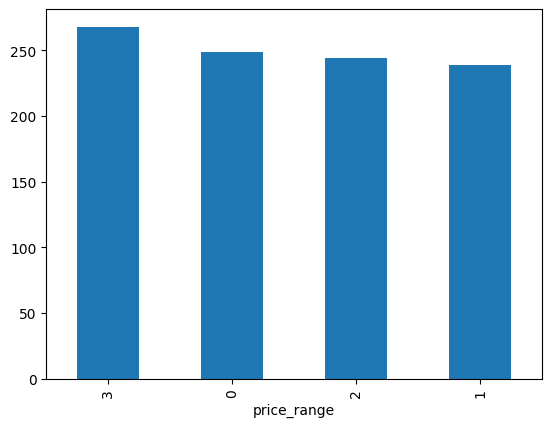

In [93]:
df_final['price_range'].value_counts().plot(kind='bar')

In [94]:
df_final.to_csv('MobileResults.csv', index=False)